# Capstone project - Retail Dataset:

### Overview:
* Sales forecasting is the process of estimating the future sales of a product or service. It is a crucial part of any company and its business plan, as it helps businesses make informed decisions about resource allocation, marketing strategy, and investment.

### About this project:
* It consists of historical sales data for 45 stores located in different regions. Each store contains a number of departments, and our objective is to predict the department-wide sales for each store. We will apply regression analysis to forecast the sales for each department based on multiple factors, such as temperature, fuel price, store type, CPI, employment index, etc.

###  Pre-Requisites
    * Python
    * Data Visualization
    * Descriptive Statistics
    * Machine Learning
    * Data Cleaning and Preprocessing

### Importing all necessary libraries:

In [1]:
#load all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder


In [2]:
import pandas as pd
# Load all the dataset:
sales = pd.read_csv("sales.csv")
features = pd.read_csv("Features.csv")
stores = pd.read_csv("stores.csv")

In [3]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [4]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
# Joining sales data with features:
sales= pd.merge(sales, features.drop(['IsHoliday'], axis = 1), how = 'left', on = ['Store', 'Date'])

In [7]:
# joining stores data with above data:
sales = pd.merge(sales, stores, how="left", on = ['Store'])

In [8]:
# checking shape of data
sales.shape

(421570, 16)

In [9]:
# head returns top 5 observations:
sales.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1,1,12/03/2010,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1,1,19/03/2010,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1,1,26/03/2010,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1,1,02/04/2010,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1,1,09/04/2010,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


In [10]:
# columns:
sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [11]:
# info() used to explore variables, their data types, and total non-null values:
sales.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [12]:
### As we can see, this dataset has 16 features, with a mix of categorical and numerical features. 
### Some features, such as markdown1-5, contain NULL values.

In [13]:
sales.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [14]:
# summary statistics of the dataset
sales[['Weekly_Sales', 'Temperature', 'CPI', 'Size']].describe()

,Weekly_Sales,Temperature,CPI,Size
count,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,60.090059,171.201947,136727.915739
std,22711.183519,18.447931,39.159276,60980.583328
min,-4988.940000,-2.060000,126.064000,34875.000000
25%,2079.650000,46.680000,132.022667,93638.000000
50%,7612.030000,62.090000,182.318780,140167.000000
75%,20205.852500,74.280000,212.416993,202505.000000
max,693099.360000,100.140000,227.232807,219622.000000


  Type  Store
0    A     22
1    B     17
2    C      6


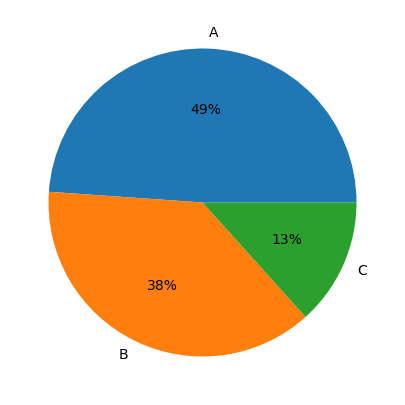

In [15]:
#This dataset contains weekly sales figures for 45 stores. Let’s explore the distribution of the store type among these 45 
# stores.

temp = pd.DataFrame(sales.groupby('Type')['Store'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (10,5))
plt.pie(temp['Store'], labels = temp['Type'], autopct = '%.0f%%')
plt.show()

<AxesSubplot:xlabel='Type', ylabel='Size'>

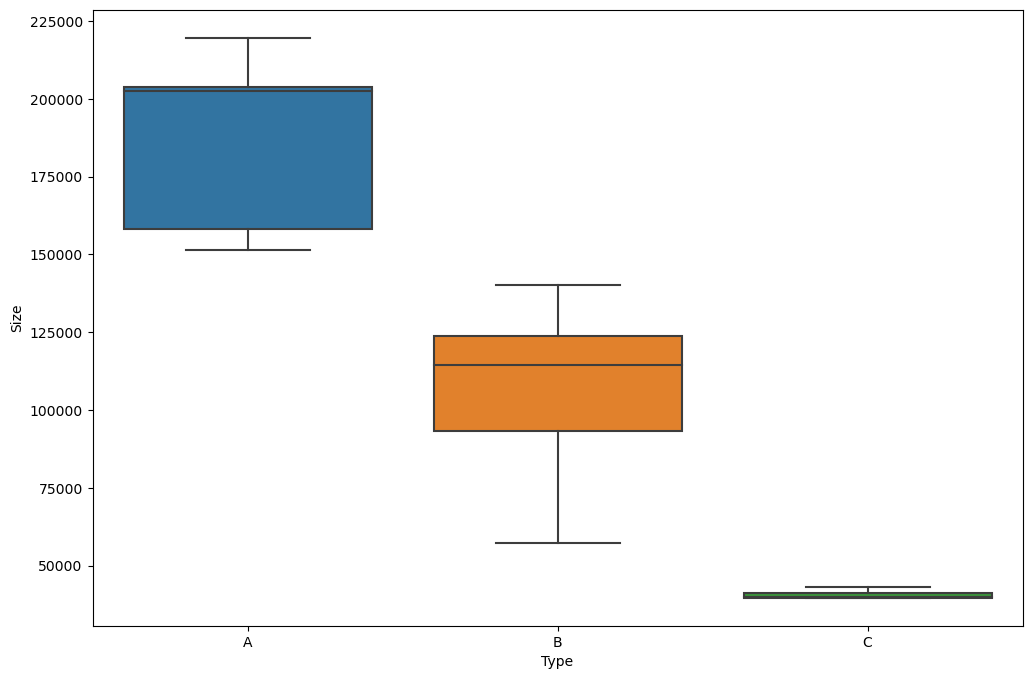

In [16]:
# size distribution of stores for each store type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Size', data = sales, showfliers = False)

In [17]:
sales['Date'].head(5).append(sales['Date'].tail(5)) # to see first and last 5 rows.

C:\Users\DELL\AppData\Local\Temp\ipykernel_15356\2882438762.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales['Date'].head(5).append(sales['Date'].tail(5)) # to see first and last 5 rows.


0         05/02/2010
1         12/02/2010
2         19/02/2010
3         26/02/2010
4         05/03/2010
421565    28/09/2012
421566    05/10/2012
421567    12/10/2012
421568    19/10/2012
421569    26/10/2012
Name: Date, dtype: object

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

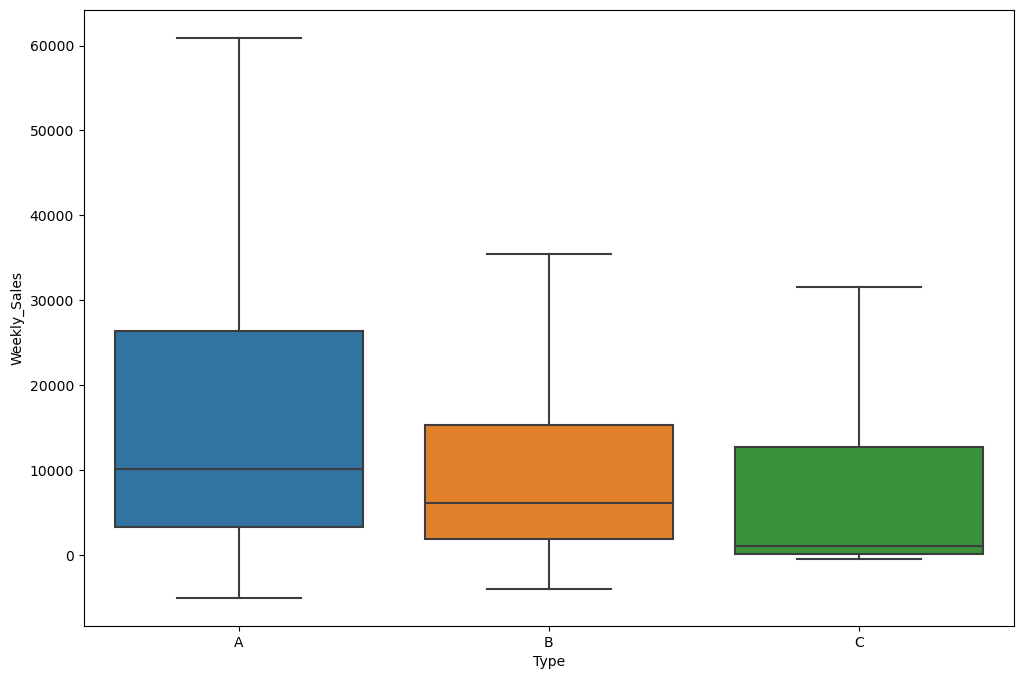

In [18]:
# Distribution of weekly sales based on store type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Type', y ='Weekly_Sales', data = sales, showfliers = False)


<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

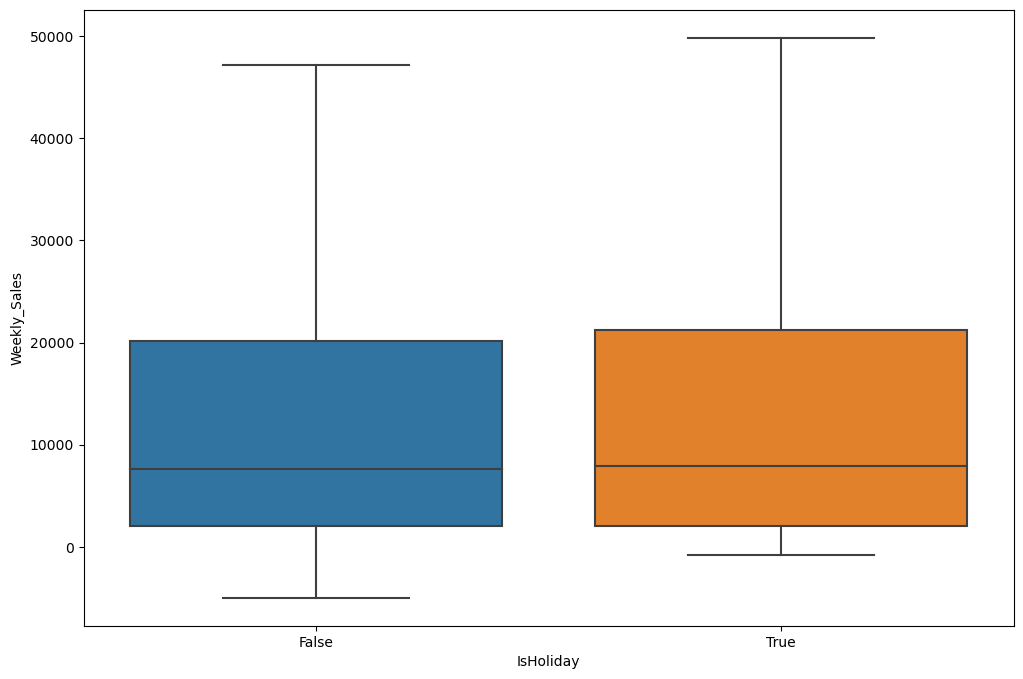

In [19]:
# impact of holidays on weekly sales
plt.figure(figsize = (12,8))
sns.boxplot(x = 'IsHoliday', y ='Weekly_Sales', data = sales, showfliers = False)


In [20]:
# IsHoliday column

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

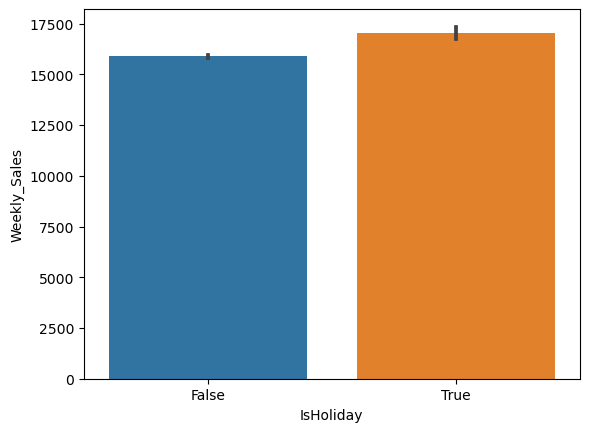

In [21]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=sales)

In [22]:
sales_holiday = sales.loc[sales['IsHoliday']==True]
sales_holiday['Date'].unique() 

array(['12/02/2010', '10/09/2010', '26/11/2010', '31/12/2010',
       '11/02/2011', '09/09/2011', '25/11/2011', '30/12/2011',
       '10/02/2012', '07/09/2012'], dtype=object)

In [23]:
sales_not_holiday = sales.loc[sales['IsHoliday']==False]
sales_not_holiday['Date'].nunique() 

133

In [24]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


<AxesSubplot:>

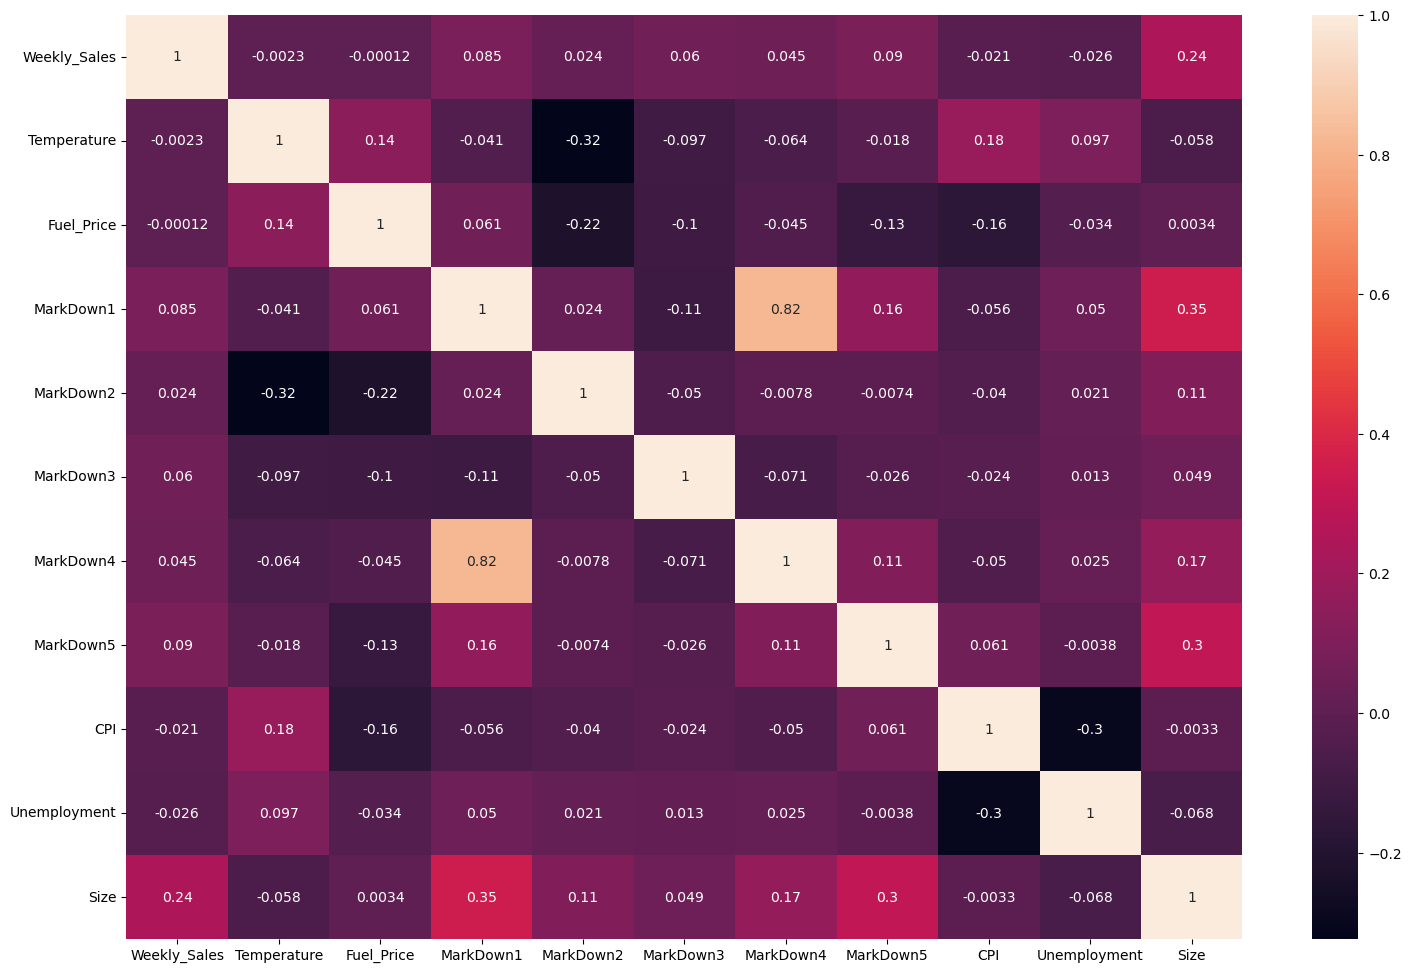

In [25]:
# Let’s analyze the correlation between numerical features and weekly sales using a heatmap.

feature_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
plt.figure(figsize = (18,12))
sns.heatmap(sales[feature_cols].corr(), annot = True)


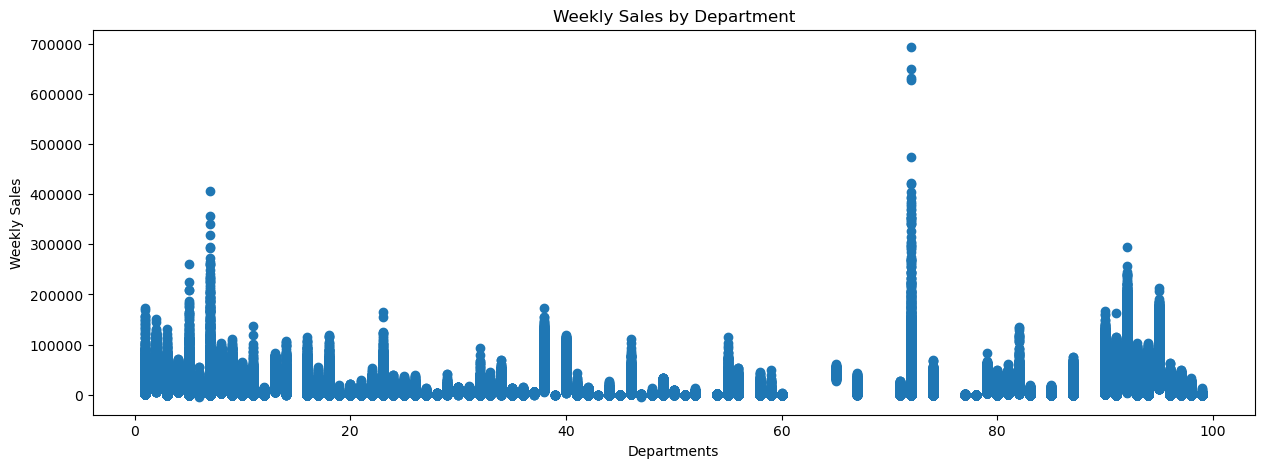

In [26]:
# deeper look in sales:

x = sales['Dept']
y = sales['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

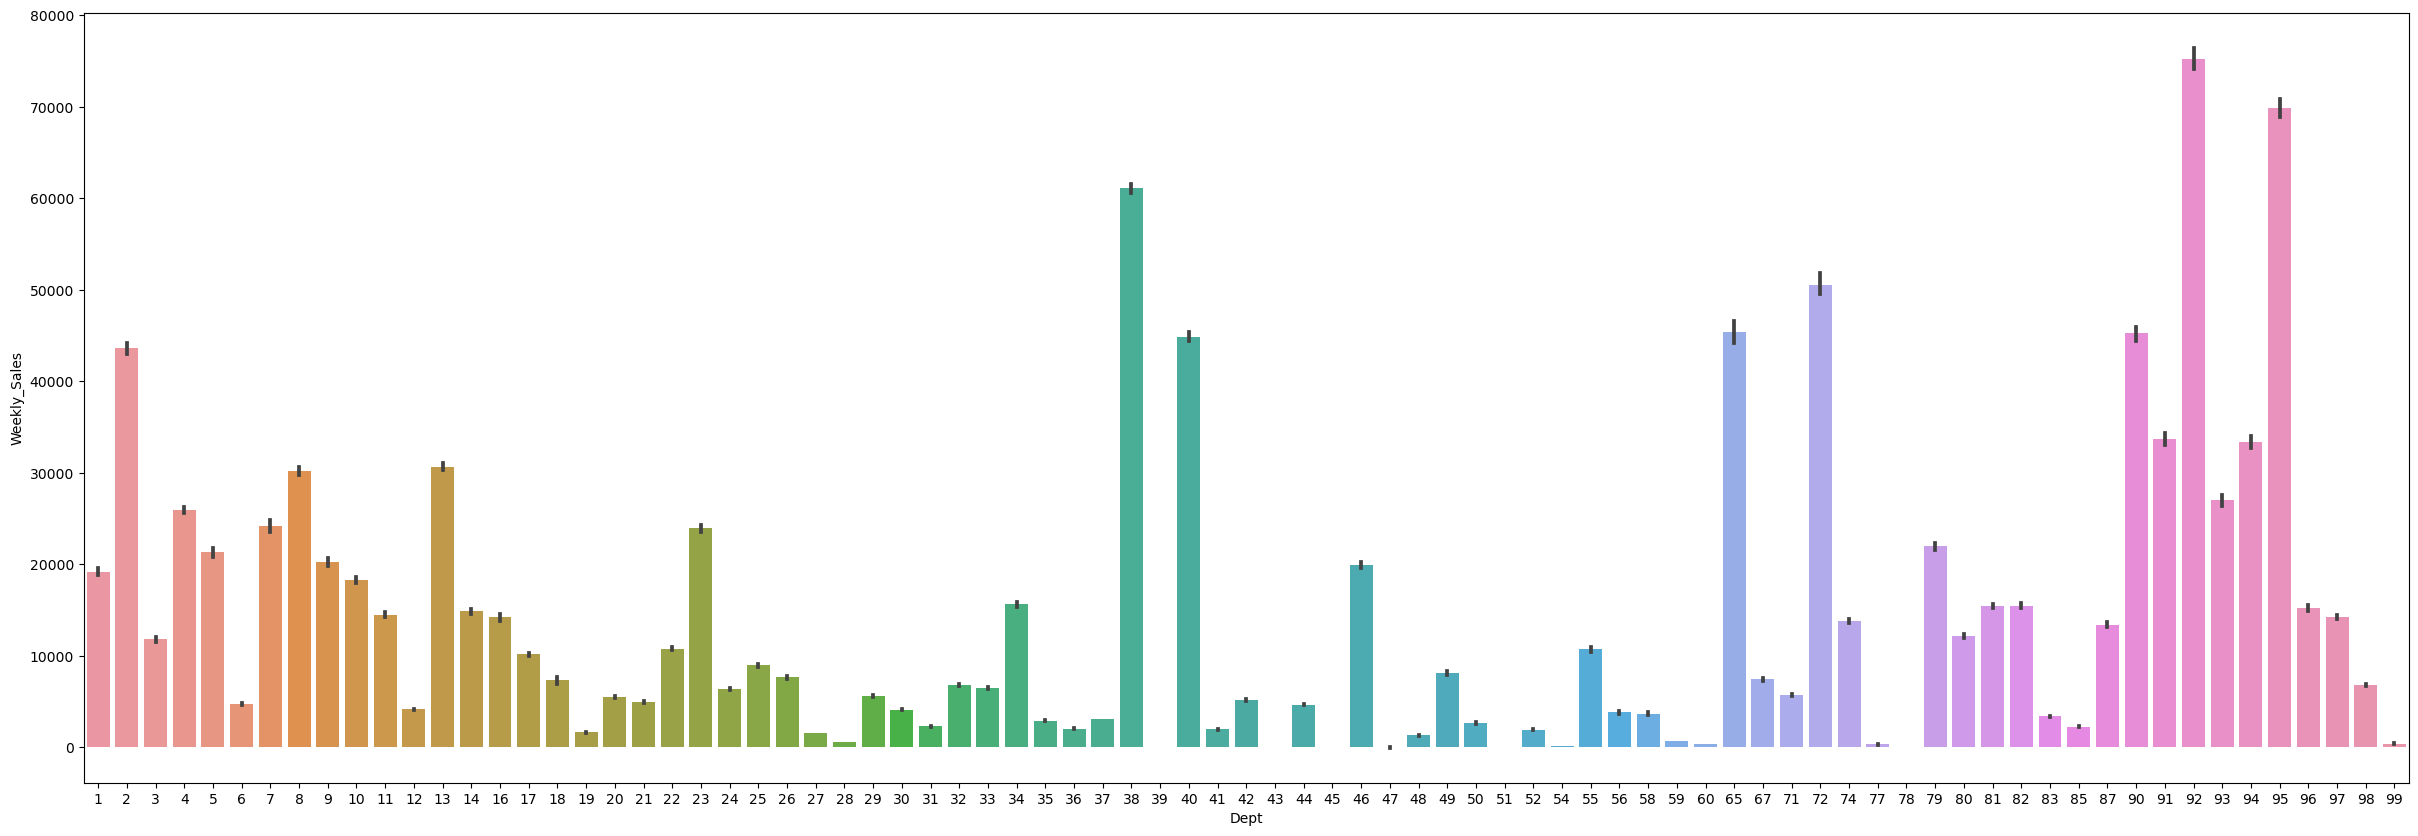

In [27]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=sales)

In [28]:
#From the first graph, it is seen that one department between 60-80(I assume it is 72), has higher sales values.
#But, when we take the averages, it is seen that department 92 has higher mean sales. Department 72 is seasonal department,
#I think. It has higher values is some seasons but on average 92 is higher.

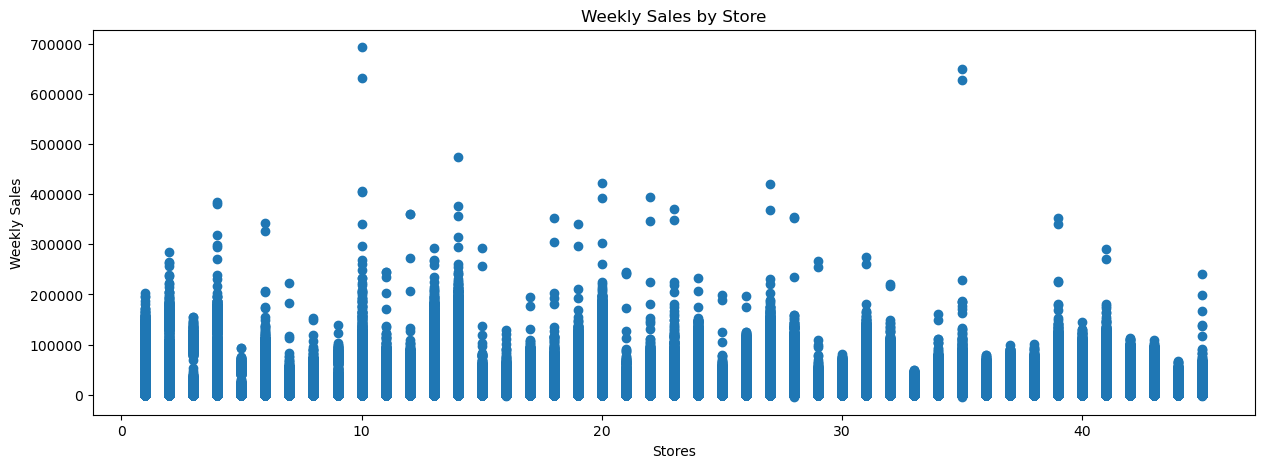

In [29]:
# weekly sales by stores:
x = sales['Store']
y = sales['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

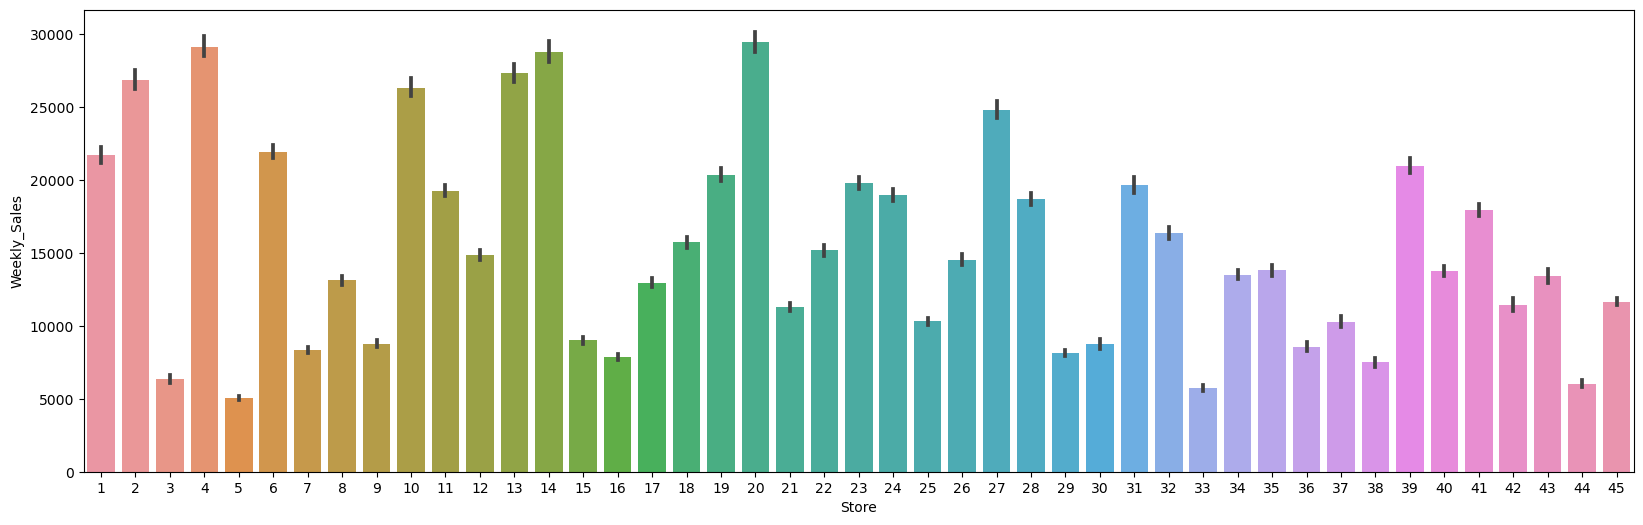

In [30]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=sales)

In [31]:
#  From the first graph, some stores has higher sales but on average store 20 is the best and 4 and 14 following it.

## Data Preprocessing

### In this stage, we will perform following steps on the dataset :-
* We will impute NULL values with 0 in MarkDown1-5 features.
* Create new features year, month, and day from date.
* Before developing the ML models, we need to one hot encode categorical features and standardize numerical features in the     dataset. Further, we will split the input data into training and testing data with an 80:20 ratio.


In [32]:
# Impute NULL values
sales['MarkDown1'] = sales['MarkDown1'].fillna(0)
sales['MarkDown2'] = sales['MarkDown2'].fillna(0)
sales['MarkDown3'] = sales['MarkDown3'].fillna(0)
sales['MarkDown4'] = sales['MarkDown4'].fillna(0)
sales['MarkDown5'] = sales['MarkDown5'].fillna(0)

In [33]:
# create year, month, and date
sales['Date'] = pd.to_datetime(sales['Date'])
sales['month_date'] = sales['Date'].apply(lambda i : i.month)
sales['day_date'] = sales['Date'].apply(lambda i : i.day)
sales['year_date'] = sales['Date'].apply(lambda i : i.year)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/03/2010' in DD/MM/YYYY format. Provide format or specify in

In [34]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month_date,day_date,year_date
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2,2010
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,12,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2,19,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2,26,2010
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,5,3,2010


In [35]:
#df.loc[datetime.date(year=2010,month=2,day=12):datetime.date(year=2014,month=2,day=1)]
sales['Date'].head(20).append(sales['Date'].tail(5))

C:\Users\DELL\AppData\Local\Temp\ipykernel_15356\3180230665.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales['Date'].head(20).append(sales['Date'].tail(5))


0        2010-05-02
1        2010-12-02
2        2010-02-19
3        2010-02-26
4        2010-05-03
5        2010-12-03
6        2010-03-19
7        2010-03-26
8        2010-02-04
9        2010-09-04
10       2010-04-16
11       2010-04-23
12       2010-04-30
13       2010-07-05
14       2010-05-14
15       2010-05-21
16       2010-05-28
17       2010-04-06
18       2010-11-06
19       2010-06-18
421565   2012-09-28
421566   2012-05-10
421567   2012-12-10
421568   2012-10-19
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

In [36]:
# one hot encoding
cols_to_encode = ['Type', 'IsHoliday']
sales = pd.get_dummies(data = sales, columns = cols_to_encode, drop_first = True)


In [37]:
sales.loc[(sales['Date'] == '2010-12-31')|(sales['Date'] == '2011-12-30'),'Christmas'] = True
sales.loc[(sales['Date'] != '2010-12-31')&(sales['Date'] != '2011-12-30'),'Christmas'] = False

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

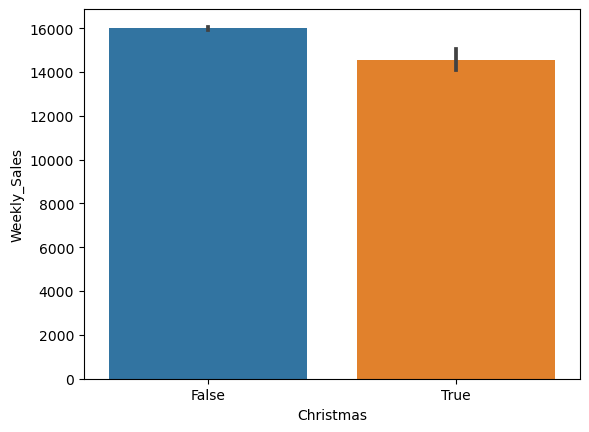

In [38]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=sales)

In [39]:
# Thanksgiving dates in Sales set
sales.loc[(sales['Date'] == '2010-11-26')|(sales['Date'] == '2011-11-25'),'Thanksgiving'] = True
sales.loc[(sales['Date'] != '2010-11-26')&(sales['Date'] != '2011-11-25'),'Thanksgiving'] = False

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

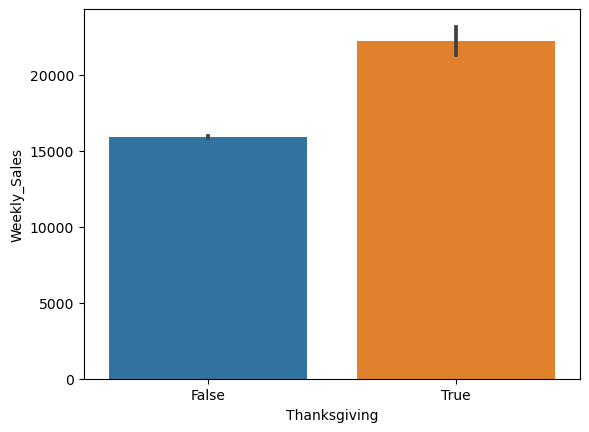

In [40]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=sales)   # Thanksgiving holiday vs not-thanksgiving

In [41]:
# Labor day dates in Data set
sales.loc[(sales['Date'] == '2010-09-10')|(sales['Date'] == '2011-09-09')|(sales['Date'] == '2012-09-07'),'Labor_Day'] = True
sales.loc[(sales['Date'] != '2010-09-10')&(sales['Date'] != '2011-09-09')&(sales['Date'] != '2012-09-07'),'Labor_Day'] = False


<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

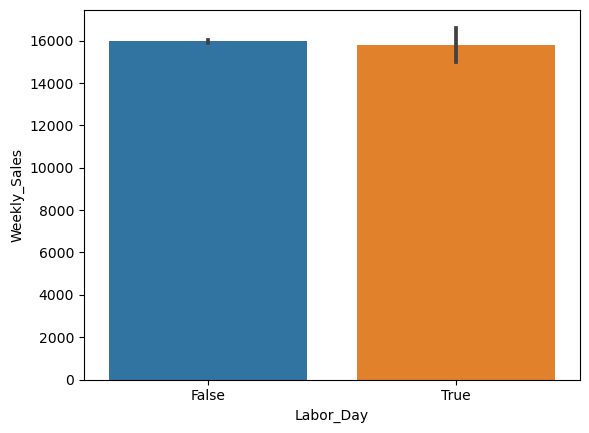

In [42]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=sales) # Labor day holiday vs not-labor day

In [43]:
# Standard Scaler
standard_scaler = StandardScaler()
feature_cols = ['Temperature', 'Fuel_Price', 'MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
transformed_features = standard_scaler.fit_transform(sales[feature_cols])

In [44]:
sales[feature_cols] = transformed_features

In [45]:
# split data into train and test
feature_cols  = sales.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['Date', 'Weekly_Sales']]
x_train, x_test, y_train, y_test = train_test_split(sales[feature_cols], sales['Weekly_Sales'], test_size = 0.2, random_state = 1234)

<AxesSubplot:xlabel='month_date'>

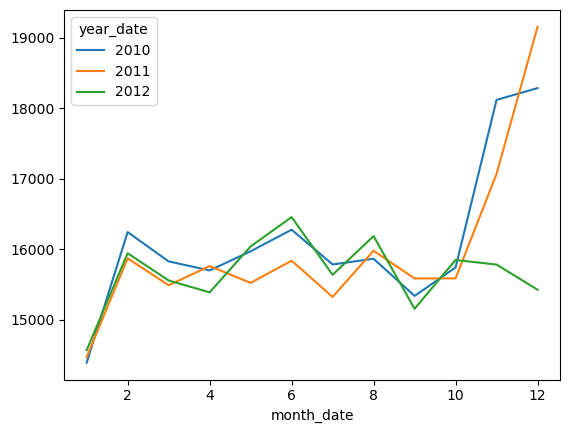

In [46]:
# monthly sales:
monthly_sales = pd.pivot_table(sales, values = "Weekly_Sales", columns = "year_date", index = "month_date")
monthly_sales.plot()

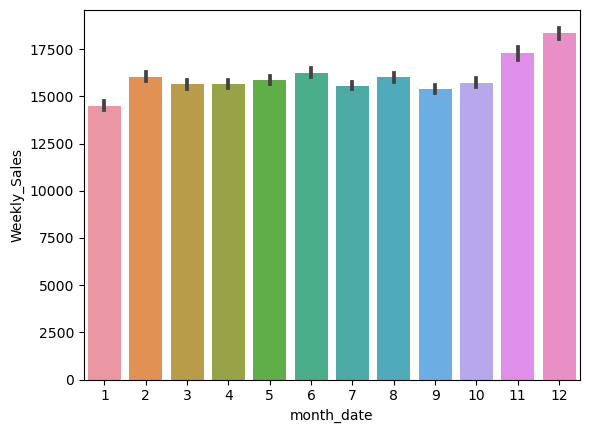

In [47]:
fig = sns.barplot(x='month_date', y='Weekly_Sales', data=sales)

* When we look at the graph above, the best sales are in December and November, as expected. The highest values are belongs
* to Thankgiving holiday but when we take average it is obvious that December has the best value.

In [48]:
sales

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Size,month_date,day_date,year_date,Type_B,Type_C,IsHoliday_True,Christmas,Thanksgiving,Labor_Day
0,1,1,2010-05-02,24924.50,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,...,0.239209,5,2,2010,0,0,0,False,False,False
1,1,1,2010-12-02,46039.49,-1.169783,-1.773177,-0.427943,-0.173069,-0.084662,-0.278117,...,0.239209,12,2,2010,0,0,1,False,False,False
2,1,1,2010-02-19,41595.55,-1.092810,-1.847330,-0.427943,-0.173069,-0.084662,-0.278117,...,0.239209,2,19,2010,0,0,0,False,False,False
3,1,1,2010-02-26,19403.54,-0.729625,-1.744825,-0.427943,-0.173069,-0.084662,-0.278117,...,0.239209,2,26,2010,0,0,0,False,False,False
4,1,1,2010-05-03,21827.90,-0.736672,-1.605243,-0.427943,-0.173069,-0.084662,-0.278117,...,0.239209,5,3,2010,0,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0.259647,1.387032,0.324919,-0.169009,-0.084391,0.132976,...,-0.303489,9,28,2012,1,0,0,False,False,False
421566,45,98,2012-05-10,628.10,0.260189,1.360860,0.405901,-0.173069,-0.081259,0.300498,...,-0.303489,5,10,2012,1,0,0,False,False,False
421567,45,98,2012-12-10,1061.02,-0.304645,1.393575,-0.104718,-0.173069,-0.083235,-0.124229,...,-0.303489,12,10,2012,1,0,0,False,False,False
421568,45,98,2012-10-19,760.01,-0.196231,1.325965,-0.096830,-0.173069,-0.084087,-0.165720,...,-0.303489,10,19,2012,1,0,0,False,False,False


## Developing the ML Models

* First, we will train a KNN regression model and evaluate its performance.
* We will use the coefficient of determination (accuracy score or r-squared score), mean absolute error (MAE), and root mean squared error (RMSE) scores to compare and evaluate the performance of the ML models.

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 10, n_jobs = 4)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {knn_regressor.score(x_test, y_test)}')


MAE is - 8787.996174253387
RMSE is - 15019.69107352986
Accuracy Score is - 0.5678844979393476


* As we can see in the above figure that r-squared score is only 0.57. Let’s plot the scatter plot between observed and predicted values of weekly sales in the test data.

<AxesSubplot:xlabel='Weekly_Sales'>

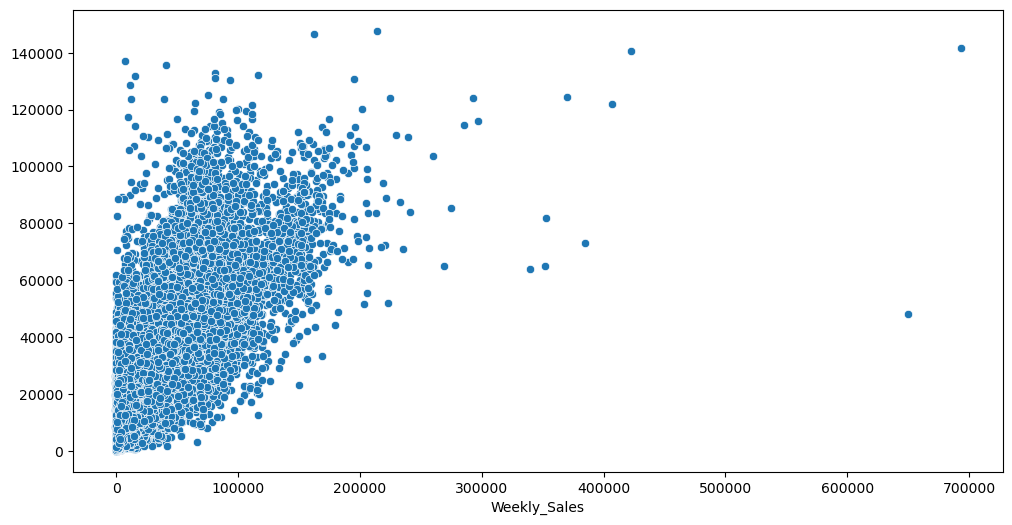

In [50]:
# scatter plot between observed and predicted values of weekly sales from KNN regressor:
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)


* As you can see in the above figure, predicted and observed values have low correlation, and points in the plot are spread out. Let’s train a Decision Tree Regressor to check whether we get any improvement in the r-squared score or not.

In [51]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 1234)
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {decision_tree_regressor.score(x_test, y_test)}')


MAE is - 2058.7297912564936
RMSE is - 5682.000964306323
Accuracy Score is - 0.938158437685483


* As we can see in the above figure, with Decision Tree Regressor, we get a huge improvement in both RMSE and r-squared score. We get an r-squared score of 0.94. Let’s train a Random Forest Regressor and check whether we get any further improvement.

In [52]:
rf_regressor = RandomForestRegressor(n_estimators = 400, max_depth = 15, random_state = 1234, n_jobs = 5)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')

MAE is - 2091.754259661774
RMSE is - 4905.826264267337
Accuracy Score is - 0.9538998674122104


* With Random Forest, we received the highest r-squared score and lowest RMSE. We got an r-squared score of 0.96. Let’s plot the scatter plot between observed and predicted values of weekly sales in the test data. As you can see, points in the plot are very tightly distributed and observed and predicted values of weekly sales have a strong correlation.

<AxesSubplot:xlabel='Weekly_Sales'>

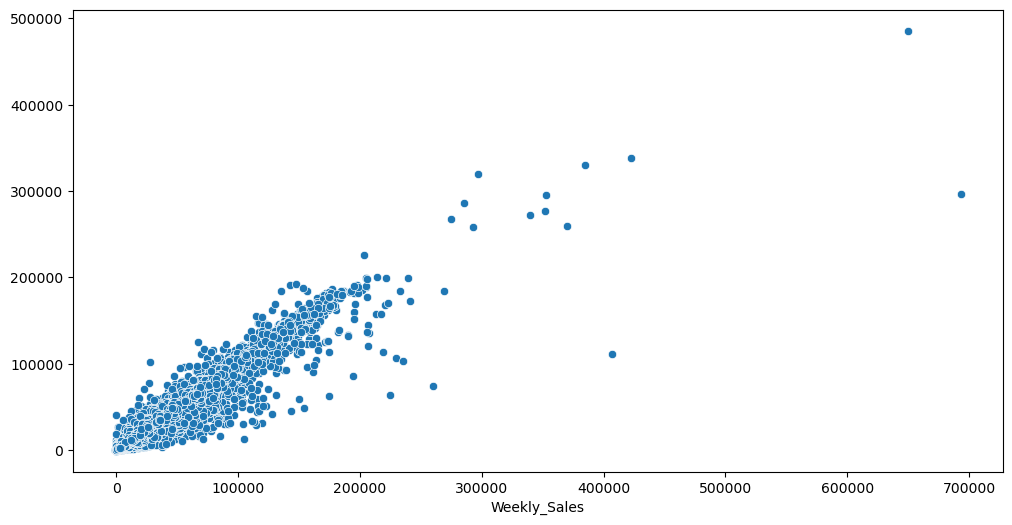

In [53]:
# scatter plot between observed and predicted values of weekly sales from Random Forest Regressor:
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)


* As you can see, Random Forest has given the highest r-squared score and lowest MAE and RMSE. Thus, we can conclude that for this problem, Random Forest Regressor works best.

## Conclusion

* We examined the 45 store’s sales forecasting dataset by applying various statistical and visualization techniques.
* We trained and developed three ML models. We also concluded that for this problem, Random Forest Regressor works best.